In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# Dataset Information

 - gender -->>  (male,female)
- race_ethnicity -->>   (Group A,B,C,D,E)
- parent_level_of_education -->> (bachelor's degree, some college, associate's degree, master's degree, high school)
- lunch: standard or free
- test preparation: completed or not compted before test
- math score
- reading score
- writing score

# Data Checks

 - Check missing values
 - Check duplicates
 - Check data type
 - Check the number of unique values in each column
 - Check statistics of dataset
 - Check various categories present in the different categorical columns
 - 

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))

print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding column for total score and average score

In [11]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
math_full = df[df['math_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()

print('Total number of students with full score in maths : {}'.format(math_full))
print('Total number of students with full score in writing : {}'.format(writing_full))
print('Total number of students with full score in reading : {}'.format(reading_full))



Total number of students with full score in maths : 7
Total number of students with full score in writing : 14
Total number of students with full score in reading : 17


In [13]:
math_less_20 = df[df['math_score']<20]['average'].count()
writing_less_20 = df[df['writing_score']<20]['average'].count()
reading_less_20 = df[df['reading_score']<20]['average'].count()

print('Toatal number of students with less than 20 marks in maths : {}'.format(math_less_20))
print('Toatal number of students with less than 20 marks in writing : {}'.format(writing_less_20))
print('Toatal number of students with less than 20 marks in reading : {}'.format(reading_less_20))


Toatal number of students with less than 20 marks in maths : 4
Toatal number of students with less than 20 marks in writing : 3
Toatal number of students with less than 20 marks in reading : 1


 - From above we can draw conclusion that students have performed worst in maths and best in reading

# Visualization

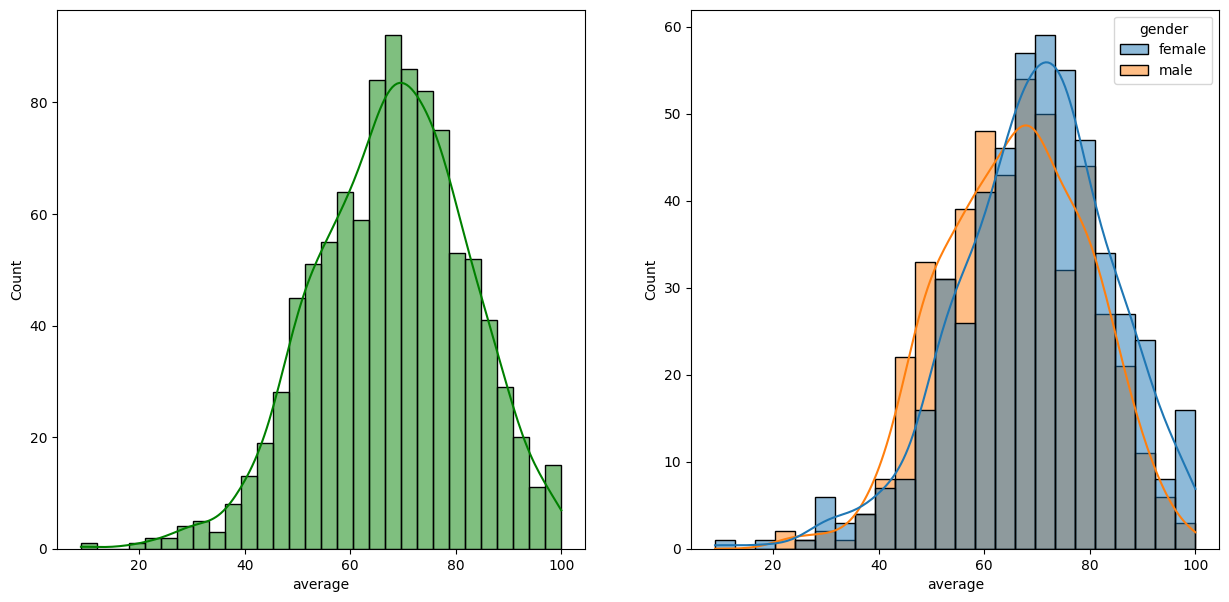

In [14]:
fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

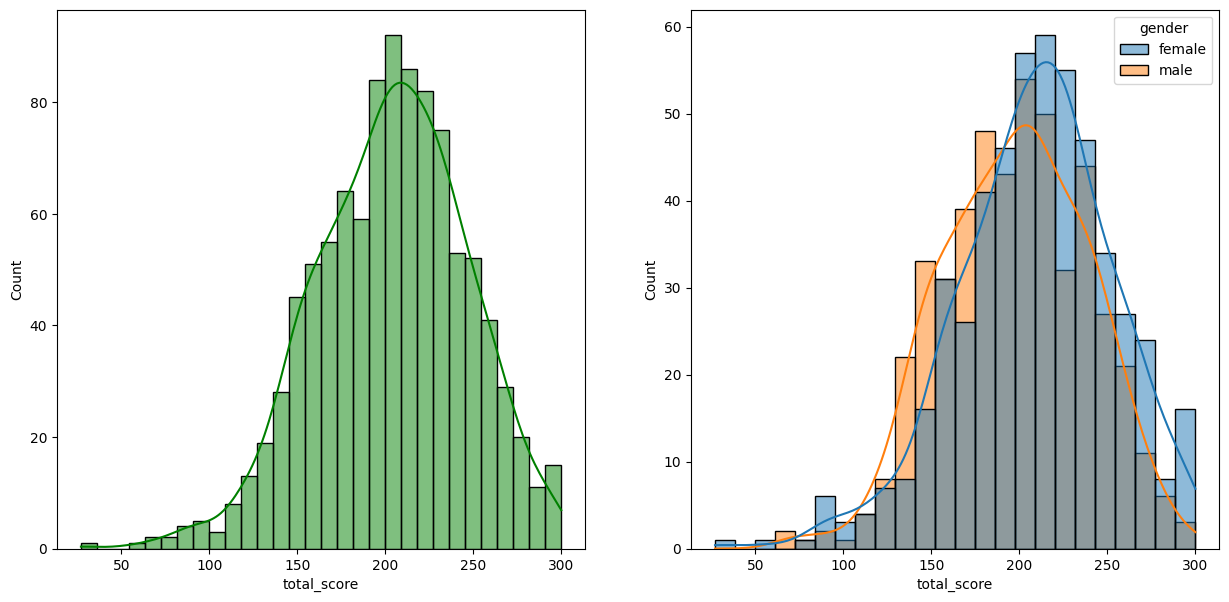

In [15]:
fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

 - According to data female students performed better than male students

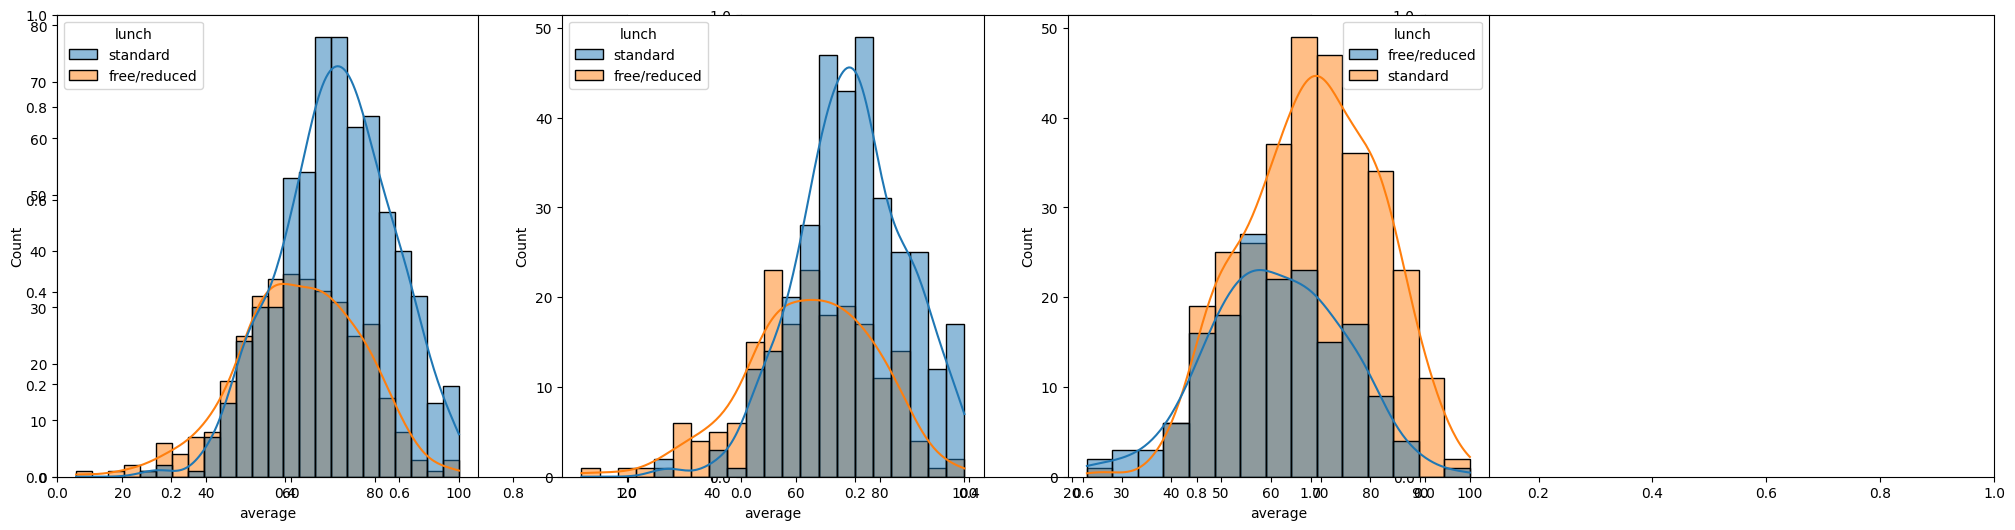

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

 - Students with standard lunch performed well in exam

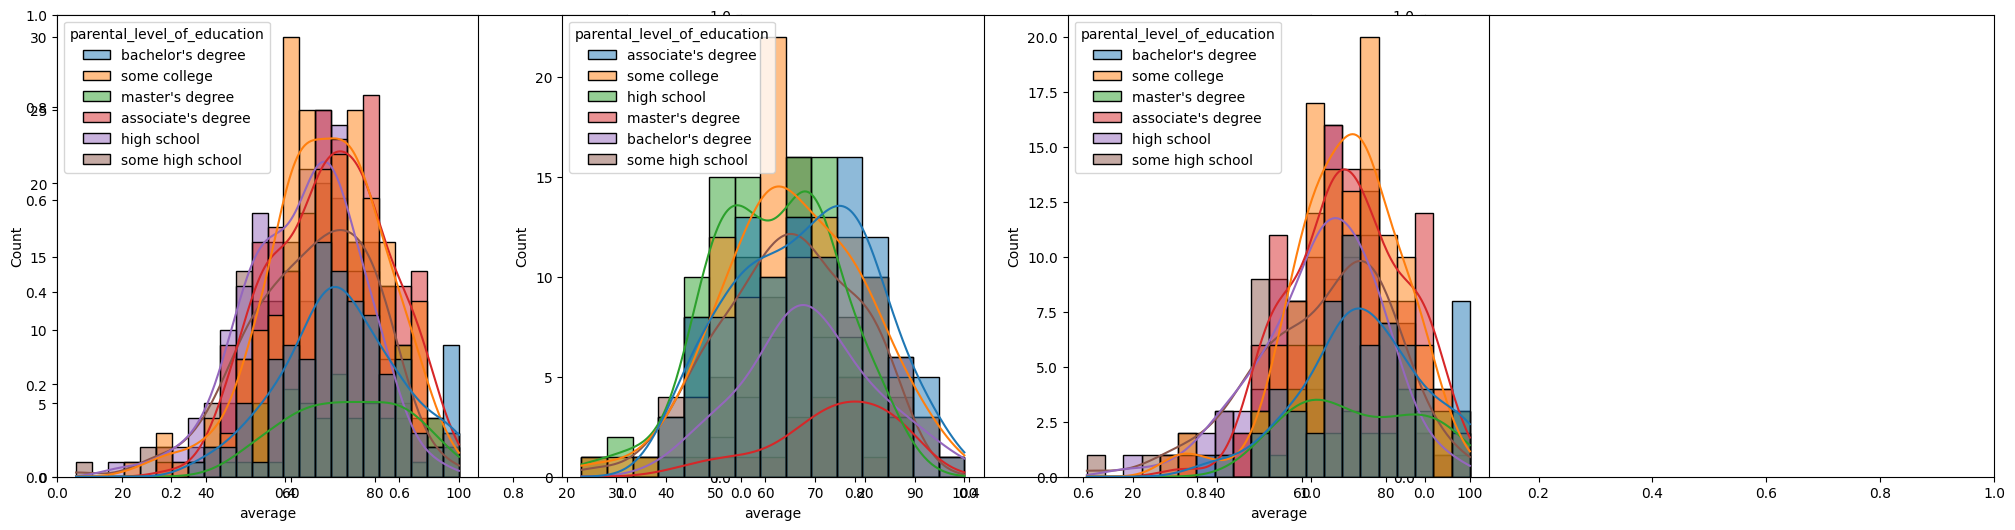

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

 - In general parent's education don't help student perform well in exam.
 - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
 - 3rd plot we can see there is no effect of parent's education on female students.

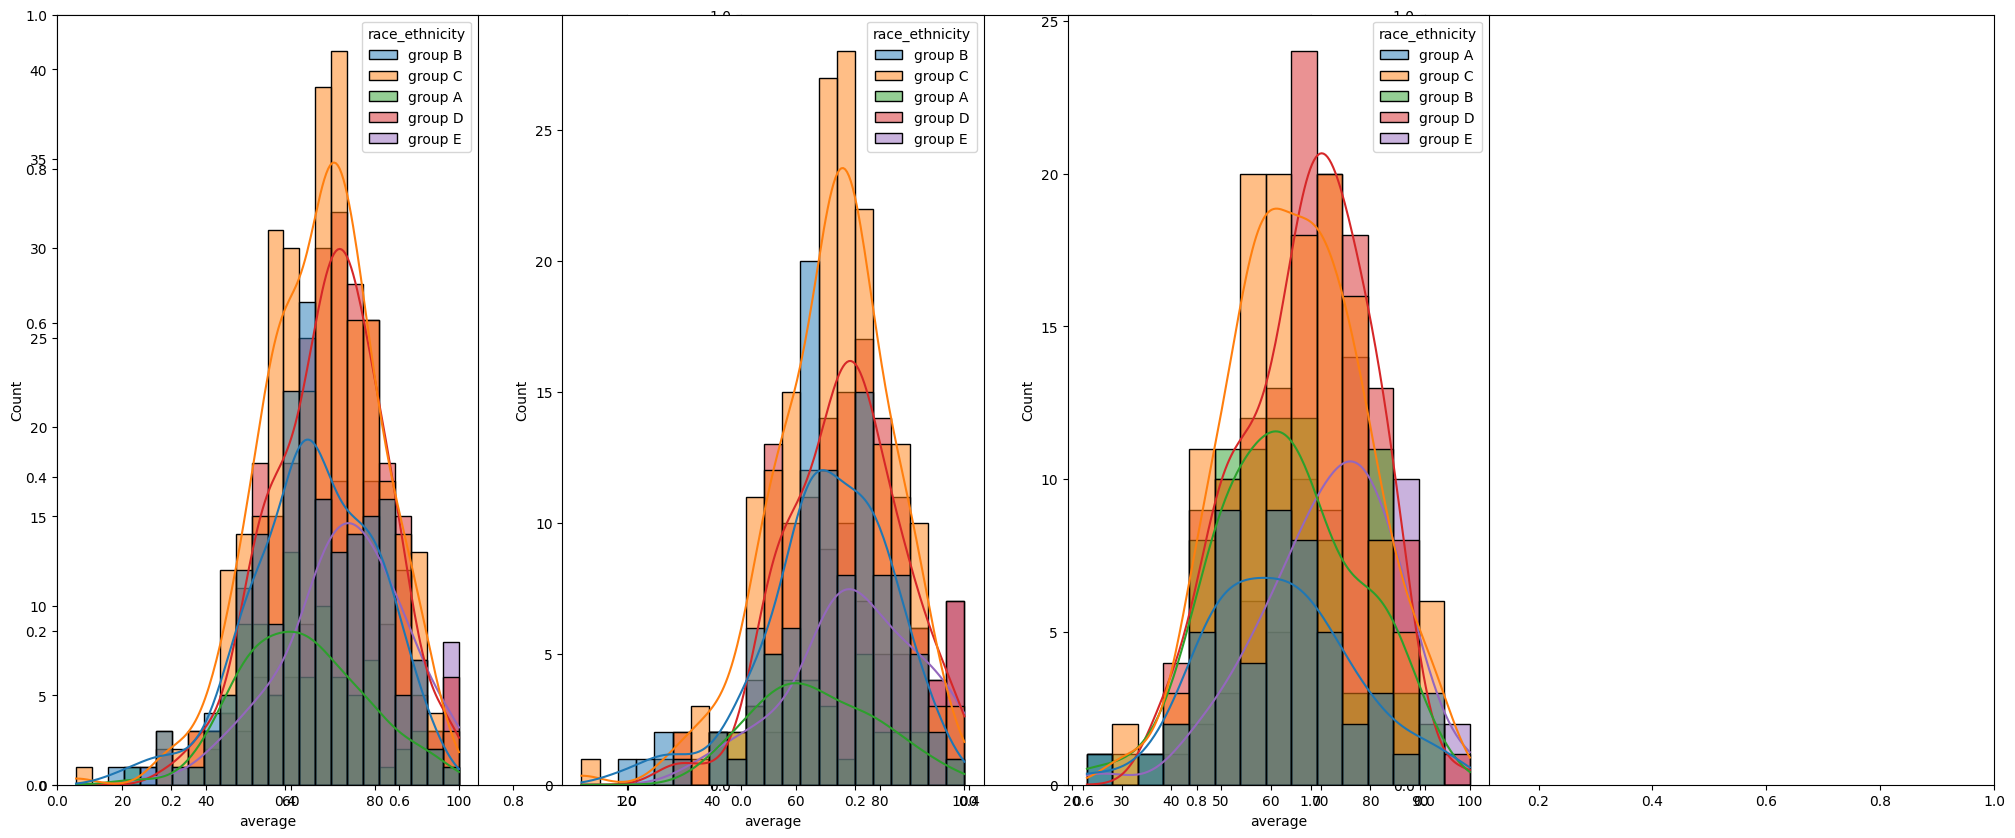

In [28]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

 - Students of group A and group B tends to perform poorly in exam.
 - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female